<a href="https://colab.research.google.com/github/Charish53/Dl_lab/blob/main/LAB05/CS22B1095_LAB05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS22B1095
 ## LAB ASSIGNMENT - 05

# 1. MNIST dataset compression and reconstruction using PCA and AutoEncoder.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
pca = PCA(n_components=4)
pca_train = pca.fit_transform(x_train)
pca_test = pca.transform(x_test)
reconstructed_pca = pca.inverse_transform(pca_test)


In [ ]:
input_dim = 784
latent_dim = 4

input_layer = keras.Input(shape=(input_dim,))
encoded = layers.Dense(128, activation='relu')(input_layer)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(latent_dim, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')


In [ ]:
autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0986 - val_loss: 0.0523
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0510 - val_loss: 0.0463
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0459 - val_loss: 0.0438
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0436 - val_loss: 0.0420
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0419 - val_loss: 0.0409
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0406 - val_loss: 0.0399
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0397 - val_loss: 0.0391
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0389 - val_loss: 0.0384
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0384 - val_loss: 0.0380
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0378 - val_loss: 0.0376
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0373 - val_loss: 0.0371
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/ste

In [ ]:
encoder = keras.Model(input_layer, encoded)
autoencoder_latent = encoder.predict(x_test)
autoencoder_reconstructed = autoencoder.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


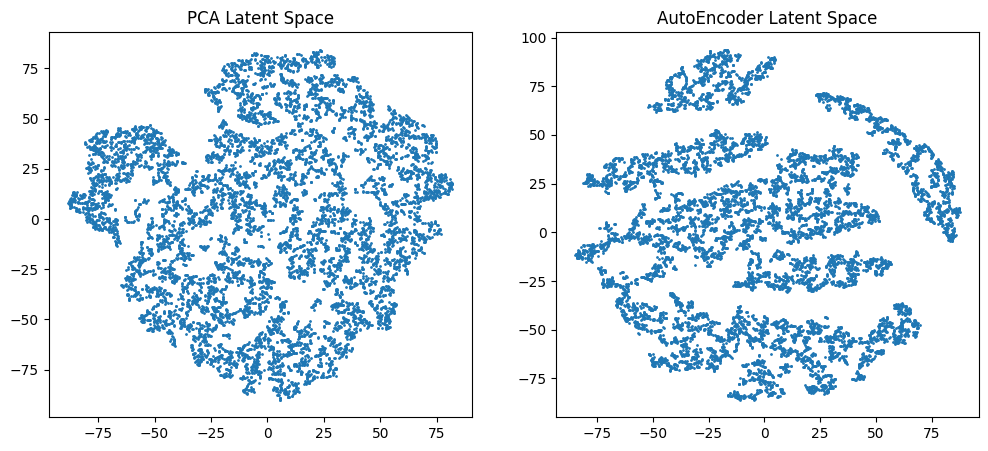

In [ ]:
pca_tsne = TSNE(n_components=2).fit_transform(pca_test)
autoencoder_tsne = TSNE(n_components=2).fit_transform(autoencoder_latent)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(pca_tsne[:, 0], pca_tsne[:, 1], s=1)
plt.title("PCA Latent Space")

plt.subplot(1, 2, 2)
plt.scatter(autoencoder_tsne[:, 0], autoencoder_tsne[:, 1], s=1)
plt.title("AutoEncoder Latent Space")
plt.show()


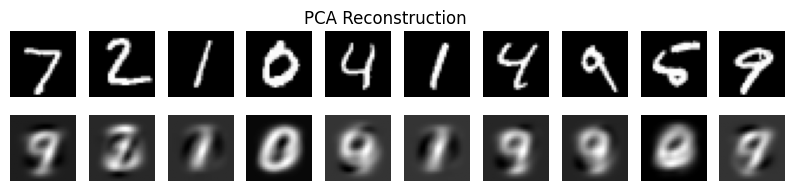

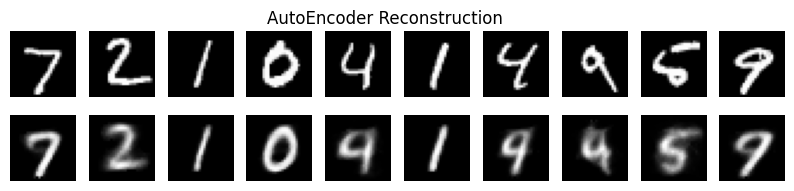

In [ ]:
def plot_images(original, reconstructed, title):
    fig, axes = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(10):
        axes[0, i].imshow(original[i].reshape(28, 28), cmap='gray')
        axes[0, i].axis('off')
        axes[1, i].imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        axes[1, i].axis('off')
    plt.suptitle(title)
    plt.show()

plot_images(x_test, reconstructed_pca, "PCA Reconstruction")
plot_images(x_test, autoencoder_reconstructed, "AutoEncoder Reconstruction")


In [ ]:
original_size = 784  # 28x28 images
pca_compressed_size = 4
autoencoder_compressed_size = 4

pca_compression_ratio = original_size / pca_compressed_size
autoencoder_compression_ratio = original_size / autoencoder_compressed_size

print(f"PCA Compression Ratio: {pca_compression_ratio}")
print(f"AutoEncoder Compression Ratio: {autoencoder_compression_ratio}")


PCA Compression Ratio: 196.0
AutoEncoder Compression Ratio: 196.0


# 2. Train an autoencoder model for anomaly classification

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving isic2020.zip to isic2020.zip


In [ ]:
from zipfile import ZipFile
import os

zip_path = "/content/isic2020.zip"  # Change this to your uploaded file
extract_path = "/content/data/"

# Extract the zip file
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction Complete!")
print("Files in /content/data/:", os.listdir(extract_path))



Extraction Complete!
Files in /content/data/: ['isic2020', 'FashionMNIST']


In [ ]:
import os

image_folder = "/content/data/"  # Change to the correct extracted folder
print("Sample files:", os.listdir(image_folder)[:10])  # Show first 10 files


Sample files: ['isic2020', 'FashionMNIST']


Total Non-Melanoma Training Images: 29978
Total Testing Images: 2182
Total Training Batches: 937
Epoch [1/20], Loss: 0.0383
Epoch [2/20], Loss: 0.0209
Epoch [3/20], Loss: 0.0205
Epoch [4/20], Loss: 0.0200
Epoch [5/20], Loss: 0.0196
Epoch [6/20], Loss: 0.0190
Epoch [7/20], Loss: 0.0187
Epoch [8/20], Loss: 0.0185
Epoch [9/20], Loss: 0.0183
Epoch [10/20], Loss: 0.0182
Epoch [11/20], Loss: 0.0181
Epoch [12/20], Loss: 0.0180
Epoch [13/20], Loss: 0.0179
Epoch [14/20], Loss: 0.0178
Epoch [15/20], Loss: 0.0177
Epoch [16/20], Loss: 0.0176
Epoch [17/20], Loss: 0.0176
Epoch [18/20], Loss: 0.0175
Epoch [19/20], Loss: 0.0175
Epoch [20/20], Loss: 0.0174


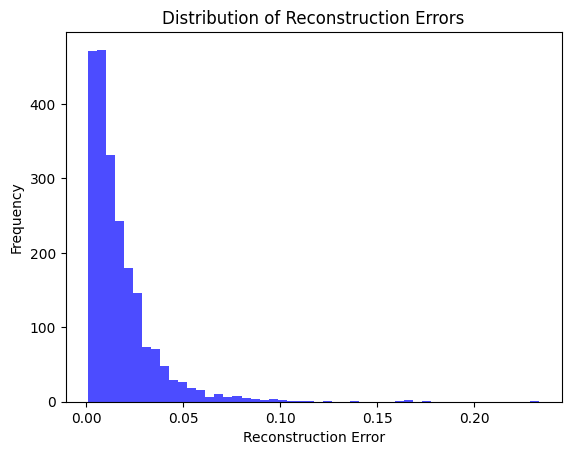

Threshold for anomaly detection: 0.0489


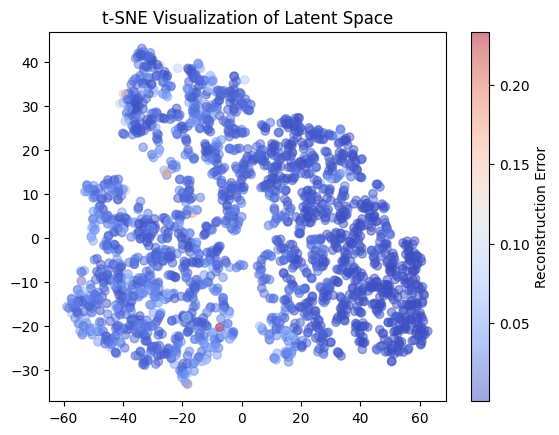

Sample 0 Difference Matrix:
[[[0.12747014 0.130422   0.23941593]
  [0.13811499 0.1253235  0.23330212]
  [0.13938999 0.1206055  0.22266695]
  ...
  [0.02912462 0.01547787 0.0195241 ]
  [0.04828519 0.01581869 0.03212172]
  [0.0855965  0.01530603 0.06450933]]

 [[0.12166554 0.13676035 0.17488883]
  [0.114182   0.124322   0.16290171]
  [0.12457919 0.13416788 0.14951128]
  ...
  [0.03607774 0.00119266 0.03302312]
  [0.03497154 0.01686844 0.01226348]
  [0.05290258 0.03619751 0.0262838 ]]

 [[0.10130793 0.11456221 0.09668405]
  [0.08523244 0.10673329 0.09161897]
  [0.0798524  0.12665626 0.05694513]
  ...
  [0.07013547 0.02015623 0.0565888 ]
  [0.04358095 0.00543192 0.02365121]
  [0.05743378 0.03419429 0.02520871]]

 ...

 [[0.05717254 0.0426027  0.01499574]
  [0.01817834 0.01493442 0.01413304]
  [0.02059126 0.01742628 0.04228894]
  ...
  [0.04135072 0.02715302 0.01527718]
  [0.07070678 0.02165318 0.00508299]
  [0.05765206 0.05803487 0.0056453 ]]

 [[0.06285262 0.06166099 0.06460559]
  [0.0429

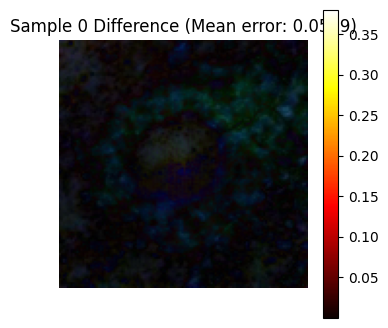

Sample 1 Difference Matrix:
[[[0.01431894 0.09875578 0.00453657]
  [0.0214265  0.11293977 0.00578803]
  [0.02992886 0.12869182 0.02663654]
  ...
  [0.06578094 0.1275374  0.09406364]
  [0.05458879 0.10215962 0.03760833]
  [0.01843882 0.06560779 0.01815891]]

 [[0.02258438 0.08134159 0.02447668]
  [0.00432706 0.08840883 0.00810322]
  [0.00308317 0.10436347 0.00482342]
  ...
  [0.05924499 0.10673696 0.07317924]
  [0.03223467 0.07423553 0.02336979]
  [0.02558613 0.07776102 0.01337245]]

 [[0.00169194 0.10121343 0.00302199]
  [0.00071681 0.10728648 0.02615824]
  [0.00954187 0.13739026 0.04134455]
  ...
  [0.04189426 0.08781222 0.05318409]
  [0.02078128 0.06780219 0.03269958]
  [0.02308023 0.0832845  0.04989788]]

 ...

 [[0.12772572 0.17679593 0.15665177]
  [0.11622864 0.15970299 0.15342098]
  [0.09041333 0.14323258 0.11978808]
  ...
  [0.06502545 0.10319576 0.06906357]
  [0.06009197 0.07542321 0.02854955]
  [0.06405807 0.03941497 0.0712761 ]]

 [[0.12238765 0.1773743  0.14993817]
  [0.1125

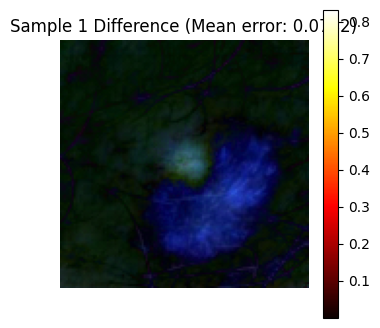

Sample 2 Difference Matrix:
[[[0.1216042  0.05719133 0.15475962]
  [0.13173267 0.0524433  0.14441043]
  [0.09480631 0.08771406 0.11232513]
  ...
  [0.07133168 0.27553463 0.07290693]
  [0.0664649  0.2703841  0.03324728]
  [0.03494251 0.2708856  0.05528872]]

 [[0.12155312 0.059738   0.1358367 ]
  [0.11843112 0.05503669 0.13015424]
  [0.10312185 0.07428734 0.12283374]
  ...
  [0.05656445 0.2574405  0.07206761]
  [0.05384845 0.22643442 0.02748052]
  [0.02559239 0.24504384 0.01770495]]

 [[0.14212456 0.03792339 0.15136746]
  [0.12739685 0.04919047 0.14560725]
  [0.11038625 0.0534655  0.13865438]
  ...
  [0.05707192 0.24779809 0.07619233]
  [0.05595744 0.24529701 0.00713928]
  [0.01411664 0.28044686 0.01644458]]

 ...

 [[0.03512245 0.10339589 0.06999697]
  [0.02952147 0.10328477 0.05901343]
  [0.05502728 0.09918615 0.07831103]
  ...
  [0.07844993 0.17061207 0.03919697]
  [0.05492777 0.14445731 0.04303795]
  [0.03095004 0.18099517 0.05728319]]

 [[0.0185625  0.14834167 0.05673274]
  [0.0429

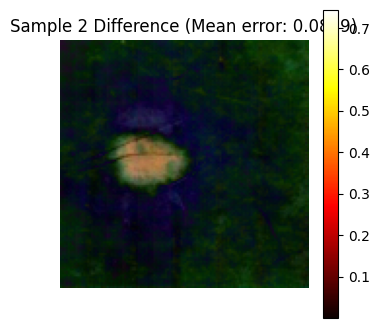

Sample 3 Difference Matrix:
[[[3.76557708e-02 3.42718363e-02 7.53620267e-02]
  [4.63294983e-02 3.94289494e-02 8.44593346e-02]
  [5.13012409e-02 3.15718055e-02 9.84207988e-02]
  ...
  [8.19048285e-02 8.04206729e-02 5.35005331e-02]
  [1.50765181e-02 5.19412756e-03 1.56745911e-02]
  [1.46642923e-02 2.96640396e-03 3.77126932e-02]]

 [[5.02387285e-02 6.07878268e-02 3.29074264e-03]
  [5.68827391e-02 6.25927150e-02 1.27445459e-02]
  [3.55362892e-03 3.83317471e-04 5.12071848e-02]
  ...
  [1.06741071e-01 1.02803171e-01 1.03739679e-01]
  [7.50583410e-03 2.67421603e-02 1.80357099e-02]
  [2.90008187e-02 1.44605041e-02 3.14668417e-02]]

 [[4.79837656e-02 7.06269145e-02 7.47442245e-03]
  [8.61803889e-02 9.20381546e-02 1.92061663e-02]
  [6.44527674e-02 3.90960276e-02 1.36315823e-04]
  ...
  [5.37320375e-02 6.49442673e-02 9.16960239e-02]
  [5.93058467e-02 6.29208088e-02 8.93541574e-02]
  [3.01183462e-02 3.95133495e-02 2.38462090e-02]]

 ...

 [[2.55451202e-02 4.62005436e-02 4.19238210e-03]
  [8.457422

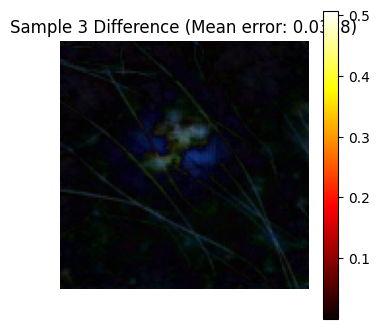

Sample 4 Difference Matrix:
[[[0.03458428 0.05025777 0.15551254]
  [0.01241517 0.0316771  0.13093302]
  [0.00678802 0.01974678 0.14639792]
  ...
  [0.02597278 0.01706526 0.08007559]
  [0.01963353 0.00189406 0.06490886]
  [0.01085383 0.01247725 0.08617458]]

 [[0.01760578 0.03282934 0.13927189]
  [0.02267522 0.04206157 0.15188494]
  [0.03160495 0.05797419 0.16920671]
  ...
  [0.02072531 0.01966423 0.07727066]
  [0.01145959 0.01190099 0.06735075]
  [0.00321853 0.0297654  0.09529901]]

 [[0.01410162 0.02995738 0.14669055]
  [0.03429365 0.06034046 0.17529845]
  [0.04501647 0.09242275 0.1808398 ]
  ...
  [0.00850844 0.01398185 0.06313705]
  [0.01148176 0.02679774 0.06905669]
  [0.00458908 0.03563434 0.08982664]]

 ...

 [[0.1551469  0.17078504 0.10970721]
  [0.11249554 0.14485717 0.05382848]
  [0.10334206 0.13432914 0.0104962 ]
  ...
  [0.06544667 0.08604243 0.02099806]
  [0.05443108 0.1262497  0.00136155]
  [0.06301463 0.17147243 0.01650003]]

 [[0.15155637 0.17711478 0.09640402]
  [0.1237

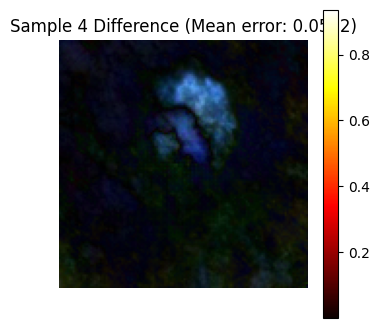

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from PIL import Image

# Set dataset path
dataset_path = "/content/data/isic2020"
train_csv_path = os.path.join(dataset_path, "train.csv")
test_csv_path = os.path.join(dataset_path, "test.csv")

# Load CSV files
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

# Filter non-melanoma images (target = 0)
non_melanoma_df = train_df[train_df['target'] == 0]

# Get image paths
train_image_paths = [os.path.join(dataset_path, "train", img + ".jpg") for img in non_melanoma_df['image_name']]
test_image_paths = [os.path.join(dataset_path, "test", img + ".jpg") for img in test_df['image_name']]

print(f"Total Non-Melanoma Training Images: {len(train_image_paths)}")
print(f"Total Testing Images: {len(test_image_paths)}")

# Define transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize to [-1,1]
])

# Custom Dataset Class
class ISICDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        img = Image.open(img_path).convert('RGB')  # Load image
        if self.transform:
            img = self.transform(img)
        return img  # Return image as Tensor

# Create DataLoaders
train_dataset = ISICDataset(train_image_paths, transform=transform)
test_dataset = ISICDataset(test_image_paths, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

print(f"Total Training Batches: {len(train_loader)}")

# Define AutoEncoder Model
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=2, padding=1),  # 64x64x16
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),  # 32x32x32
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),  # 16x16x64
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(16*16*64, 4),  # 4D latent space
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(4, 16*16*64),
            nn.ReLU(),
            nn.Unflatten(1, (64, 16, 16)),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),  # 32x32x32
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),  # 64x64x16
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, kernel_size=3, stride=2, padding=1, output_padding=1),  # 128x128x3
            nn.Tanh()  # Output in [-1,1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Initialize AutoEncoder
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
autoencoder = AutoEncoder().to(device)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Train AutoEncoder
num_epochs = 20

for epoch in range(num_epochs):
    total_loss = 0
    for batch in train_loader:
        images = batch.to(device)
        optimizer.zero_grad()

        # Forward pass
        outputs = autoencoder(images)
        loss = criterion(outputs, images)

        # Backpropagation
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_loader):.4f}")

# Evaluate AutoEncoder on Test Data
autoencoder.eval()
reconstruction_errors = []

with torch.no_grad():
    for img in test_loader:
        img = img.to(device)
        reconstructed_img = autoencoder(img)
        loss = criterion(reconstructed_img, img)  # MSE Loss
        reconstruction_errors.append(loss.item())

# Convert to NumPy array
reconstruction_errors = np.array(reconstruction_errors)

# Plot Reconstruction Error Distribution
plt.hist(reconstruction_errors, bins=50, color='blue', alpha=0.7)
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.title("Distribution of Reconstruction Errors")
plt.show()

# Set Anomaly Detection Threshold (95th Percentile)
threshold = np.percentile(reconstruction_errors, 95)
print(f"Threshold for anomaly detection: {threshold:.4f}")

# Extract Latent Vectors
latent_vectors = []

with torch.no_grad():
    for img in test_loader:
        img = img.to(device)
        latent_vector = autoencoder.encoder(img).cpu().numpy()
        latent_vectors.append(latent_vector)

latent_vectors = np.array(latent_vectors).squeeze()

# Perform t-SNE for Visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(latent_vectors)

plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=reconstruction_errors, cmap='coolwarm', alpha=0.5)
plt.colorbar(label="Reconstruction Error")
plt.title("t-SNE Visualization of Latent Space")
plt.show()

# Compare Original and Reconstructed Images
test_images_reshaped = np.array([test_loader.dataset[i].numpy().transpose(1, 2, 0) for i in range(5)])
ae_recon_images_reshaped = np.array([autoencoder(test_loader.dataset[i].unsqueeze(0).to(device)).cpu().detach().numpy().squeeze().transpose(1, 2, 0) for i in range(5)])

# Display Differences
num_samples_to_show = 5

for i in range(num_samples_to_show):
    orig_img = test_images_reshaped[i]
    recon_img = ae_recon_images_reshaped[i]

    diff_img = np.abs(orig_img - recon_img)
    mean_error = np.mean(diff_img)

    print(f"Sample {i} Difference Matrix:")
    print(diff_img)
    print(f"Mean Absolute Error for sample {i}: {mean_error:.4f}\n")

    plt.figure(figsize=(4, 4))
    plt.imshow(diff_img, cmap='hot')
    plt.title(f"Sample {i} Difference (Mean error: {mean_error:.4f})")
    plt.colorbar()
    plt.axis('off')
    plt.show()


Sample 0 Difference Matrix:
[[[0.12747014 0.130422   0.23941593]
  [0.13811499 0.1253235  0.23330212]
  [0.13938999 0.1206055  0.22266695]
  ...
  [0.02912462 0.01547787 0.0195241 ]
  [0.04828519 0.01581869 0.03212172]
  [0.0855965  0.01530603 0.06450933]]

 [[0.12166554 0.13676035 0.17488883]
  [0.114182   0.124322   0.16290171]
  [0.12457919 0.13416788 0.14951128]
  ...
  [0.03607774 0.00119266 0.03302312]
  [0.03497154 0.01686844 0.01226348]
  [0.05290258 0.03619751 0.0262838 ]]

 [[0.10130793 0.11456221 0.09668405]
  [0.08523244 0.10673329 0.09161897]
  [0.0798524  0.12665626 0.05694513]
  ...
  [0.07013547 0.02015623 0.0565888 ]
  [0.04358095 0.00543192 0.02365121]
  [0.05743378 0.03419429 0.02520871]]

 ...

 [[0.05717254 0.0426027  0.01499574]
  [0.01817834 0.01493442 0.01413304]
  [0.02059126 0.01742628 0.04228894]
  ...
  [0.04135072 0.02715302 0.01527718]
  [0.07070678 0.02165318 0.00508299]
  [0.05765206 0.05803487 0.0056453 ]]

 [[0.06285262 0.06166099 0.06460559]
  [0.0429

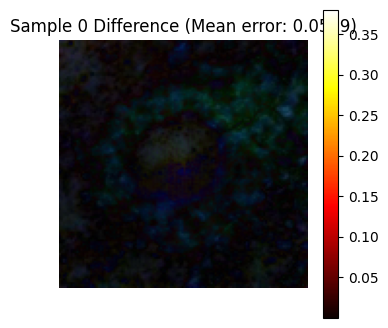

Sample 1 Difference Matrix:
[[[0.01431894 0.09875578 0.00453657]
  [0.0214265  0.11293977 0.00578803]
  [0.02992886 0.12869182 0.02663654]
  ...
  [0.06578094 0.1275374  0.09406364]
  [0.05458879 0.10215962 0.03760833]
  [0.01843882 0.06560779 0.01815891]]

 [[0.02258438 0.08134159 0.02447668]
  [0.00432706 0.08840883 0.00810322]
  [0.00308317 0.10436347 0.00482342]
  ...
  [0.05924499 0.10673696 0.07317924]
  [0.03223467 0.07423553 0.02336979]
  [0.02558613 0.07776102 0.01337245]]

 [[0.00169194 0.10121343 0.00302199]
  [0.00071681 0.10728648 0.02615824]
  [0.00954187 0.13739026 0.04134455]
  ...
  [0.04189426 0.08781222 0.05318409]
  [0.02078128 0.06780219 0.03269958]
  [0.02308023 0.0832845  0.04989788]]

 ...

 [[0.12772572 0.17679593 0.15665177]
  [0.11622864 0.15970299 0.15342098]
  [0.09041333 0.14323258 0.11978808]
  ...
  [0.06502545 0.10319576 0.06906357]
  [0.06009197 0.07542321 0.02854955]
  [0.06405807 0.03941497 0.0712761 ]]

 [[0.12238765 0.1773743  0.14993817]
  [0.1125

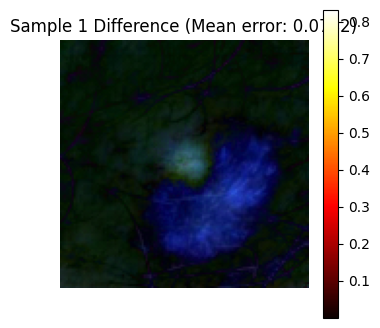

Sample 2 Difference Matrix:
[[[0.1216042  0.05719133 0.15475962]
  [0.13173267 0.0524433  0.14441043]
  [0.09480631 0.08771406 0.11232513]
  ...
  [0.07133168 0.27553463 0.07290693]
  [0.0664649  0.2703841  0.03324728]
  [0.03494251 0.2708856  0.05528872]]

 [[0.12155312 0.059738   0.1358367 ]
  [0.11843112 0.05503669 0.13015424]
  [0.10312185 0.07428734 0.12283374]
  ...
  [0.05656445 0.2574405  0.07206761]
  [0.05384845 0.22643442 0.02748052]
  [0.02559239 0.24504384 0.01770495]]

 [[0.14212456 0.03792339 0.15136746]
  [0.12739685 0.04919047 0.14560725]
  [0.11038625 0.0534655  0.13865438]
  ...
  [0.05707192 0.24779809 0.07619233]
  [0.05595744 0.24529701 0.00713928]
  [0.01411664 0.28044686 0.01644458]]

 ...

 [[0.03512245 0.10339589 0.06999697]
  [0.02952147 0.10328477 0.05901343]
  [0.05502728 0.09918615 0.07831103]
  ...
  [0.07844993 0.17061207 0.03919697]
  [0.05492777 0.14445731 0.04303795]
  [0.03095004 0.18099517 0.05728319]]

 [[0.0185625  0.14834167 0.05673274]
  [0.0429

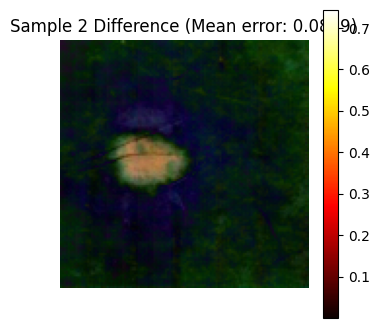

In [ ]:
num_samples_to_show = 3

for i in range(num_samples_to_show):
    orig_img = test_images_reshaped[i]
    recon_img = ae_recon_images_reshaped[i]

    diff_img = np.abs(orig_img - recon_img)
    mean_error = np.mean(diff_img)

    print(f"Sample {i} Difference Matrix:")
    print(diff_img)
    print(f"Mean Absolute Error for sample {i}: {mean_error:.4f}\n")

    plt.figure(figsize=(4, 4))
    plt.imshow(diff_img, cmap='hot')
    plt.title(f"Sample {i} Difference (Mean error: {mean_error:.4f})")
    plt.colorbar()
    plt.axis('off')
    plt.show()

# 3 . Train a VAE model for generating new data similar to training set.


Using device: cuda
✅ FashionMNIST dataset loaded successfully!
Epoch [1/20], Loss: 105.6819
Epoch [2/20], Loss: 73.1724
Epoch [3/20], Loss: 68.5372
Epoch [4/20], Loss: 66.1424
Epoch [5/20], Loss: 64.5682
Epoch [6/20], Loss: 63.5809
Epoch [7/20], Loss: 62.7550
Epoch [8/20], Loss: 62.0614
Epoch [9/20], Loss: 61.4958
Epoch [10/20], Loss: 61.1209
Epoch [11/20], Loss: 60.7625
Epoch [12/20], Loss: 60.3590
Epoch [13/20], Loss: 60.1218
Epoch [14/20], Loss: 59.7859
Epoch [15/20], Loss: 59.5987
Epoch [16/20], Loss: 59.3455
Epoch [17/20], Loss: 59.1716
Epoch [18/20], Loss: 59.0346
Epoch [19/20], Loss: 58.8093
Epoch [20/20], Loss: 58.6881
✅ Training Completed!


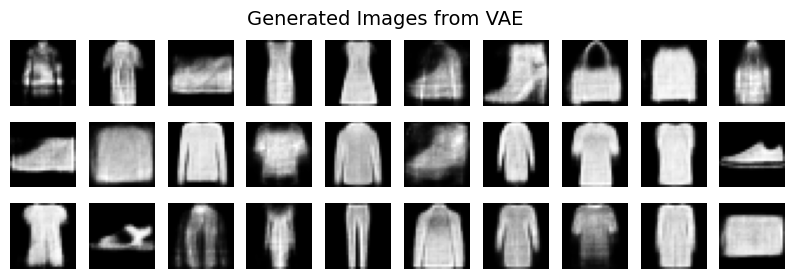

In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Ensure GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# ---------------------------
# 1️⃣ Load Dataset (FashionMNIST)
# ---------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize to [-1,1]
])

train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

print("✅ FashionMNIST dataset loaded successfully!")

# ---------------------------
# 2️⃣ Define VAE Model
# ---------------------------
class VAE(nn.Module):
    def __init__(self, latent_dim=10):
        super(VAE, self).__init__()
        self.latent_dim = latent_dim

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU()
        )

        # Latent space
        self.mu_layer = nn.Linear(256, latent_dim)
        self.log_var_layer = nn.Linear(256, latent_dim)

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 28 * 28),
            nn.Tanh()  # Output in [-1,1]
        )

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        x = self.encoder(x)
        mu = self.mu_layer(x)
        log_var = self.log_var_layer(x)

        z = self.reparameterize(mu, log_var)

        out = self.decoder(z)
        return out, mu, log_var

# Instantiate model
vae = VAE(latent_dim=10).to(device)

# ---------------------------
# 3️⃣ Define Loss Function
# ---------------------------
def vae_loss(reconstructed_x, x, mu, log_var):
    reconstruction_loss = nn.functional.mse_loss(reconstructed_x, x, reduction="sum")
    kl_divergence = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return reconstruction_loss + kl_divergence

# Optimizer
optimizer = optim.Adam(vae.parameters(), lr=0.001)

# ---------------------------
# 4️⃣ Train the VAE Model
# ---------------------------
num_epochs = 20

for epoch in range(num_epochs):
    total_loss = 0
    for batch, _ in train_loader:
        batch = batch.view(-1, 28 * 28).to(device)  # Flatten images

        optimizer.zero_grad()

        reconstructed_batch, mu, log_var = vae(batch)

        loss = vae_loss(reconstructed_batch, batch, mu, log_var)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader.dataset):.4f}")

print("✅ Training Completed!")

# ---------------------------
# 5️⃣ Generate Images from VAE
# ---------------------------
vae.eval()

# Sample from a normal distribution
z_samples = torch.randn(30, 10).to(device)

with torch.no_grad():
    generated_images = vae.decoder(z_samples).cpu().numpy()

generated_images = generated_images.reshape(-1, 28, 28)

# Plot generated images
fig, axes = plt.subplots(3, 10, figsize=(10, 3))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(generated_images[i], cmap="gray")
    ax.axis("off")

plt.suptitle("Generated Images from VAE", fontsize=14)
plt.show()
